In [83]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [84]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [85]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [86]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [87]:



df = getQuotes(frameM30, 2023, 8, 1)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1690828200,1.10258,1.10293,1.10176,1.10179,2532,8,0
1,1690830000,1.10180,1.10199,1.10107,1.10114,1748,8,0
2,1690831800,1.10114,1.10127,1.10036,1.10065,1719,8,0
3,1690833600,1.10065,1.10110,1.10044,1.10086,1311,8,0
4,1690835400,1.10086,1.10104,1.10037,1.10044,1157,8,0
...,...,...,...,...,...,...,...,...
1435,1694448000,1.07271,1.07352,1.07253,1.07346,2832,9,0
1436,1694449800,1.07346,1.07367,1.07219,1.07353,5212,9,0
1437,1694451600,1.07354,1.07589,1.07344,1.07525,5022,9,0
1438,1694453400,1.07526,1.07554,1.07445,1.07452,4341,9,0


In [88]:




def calculateBollingerBands(df, length = 20, std = 2, mamode = 'ema'):
    bbands = ta.bbands(close=df['close'], length=length, std=std, mamode=mamode)
    df[f'BBL_{length}_{float(std)}'] = bbands[f'BBL_{length}_{float(std)}']
    df[f'BBM_{length}_{float(std)}'] = bbands[f'BBM_{length}_{float(std)}']
    df[f'BBU_{length}_{float(std)}'] = bbands[f'BBU_{length}_{float(std)}']
    return df





In [89]:




def calculateKeltnerChannel(df, length=20, scalar=2, mamode='ema'):
    kc = ta.kc(high=df['high'], low=df['low'], close=df['close'], length=length, scalar=scalar, mamode=mamode)
    df[f'KCLe_{length}_{float(scalar)}'] = kc[f'KCLe_{length}_{float(scalar)}']
    df[f'KCBe_{length}_{float(scalar)}'] = kc[f'KCBe_{length}_{float(scalar)}']
    df[f'KCUe_{length}_{float(scalar)}'] = kc[f'KCUe_{length}_{float(scalar)}']
    return df






In [90]:




def calculateDonchainChannel(df, length=20, median=True):
    df[f'DCH_{length}'] = df['close'].rolling(window=length).max()
    df[f'DCL_{length}'] = df['close'].rolling(window=length).min()
    df[f'DCM_{length}'] = (df[f'DCH_{length}'] + df[f'DCL_{length}'])/2
    return df





In [91]:



def calculateEma(df, length=20, prefix=''):
    if prefix:
        prefix = '_' + prefix
    df[f'EMA_{length}{prefix}'] = ta.ema(close=df['close'], length=20)
    return df



In [92]:



length= 20
std=2

df = calculateBollingerBands(df, length, std)
df = calculateKeltnerChannel(df, length, std)
df = calculateDonchainChannel(df, length)
df = calculateEma(df, length)

df['DIFF'] = (df['close'] - ((df[f'EMA_{length}'] + df[f'DCM_{length}']) / 2))

df[f'DIFF_EMA_{length}'] = ta.ema(close=df['DIFF'], length=length)

df




,time,open,high,low,close,tick_volume,spread,real_volume,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,KCLe_20_2.0,KCBe_20_2.0,KCUe_20_2.0,DCH_20,DCL_20,DCM_20,EMA_20,DIFF,DIFF_EMA_20
0,1690828200,1.10258,1.10293,1.10176,1.10179,2532,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1690830000,1.10180,1.10199,1.10107,1.10114,1748,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1690831800,1.10114,1.10127,1.10036,1.10065,1719,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1690833600,1.10065,1.10110,1.10044,1.10086,1311,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1690835400,1.10086,1.10104,1.10037,1.10044,1157,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1694448000,1.07271,1.07352,1.07253,1.07346,2832,9,0,1.071652,1.072604,1.073557,1.070897,1.072604,1.074311,1.07381,1.07193,1.07287,1.072604,0.000723,0.000320
1436,1694449800,1.07346,1.07367,1.07219,1.07353,5212,9,0,1.071747,1.072692,1.073638,1.070866,1.072692,1.074519,1.07381,1.07193,1.07287,1.072692,0.000749,0.000360
1437,1694451600,1.07354,1.07589,1.07344,1.07525,5022,9,0,1.071551,1.072936,1.074321,1.070817,1.072936,1.075055,1.07525,1.07193,1.07359,1.072936,0.001987,0.000515
1438,1694453400,1.07526,1.07554,1.07445,1.07452,4341,9,0,1.071568,1.073087,1.074605,1.070962,1.073087,1.075212,1.07525,1.07193,1.07359,1.073087,0.001182,0.000579


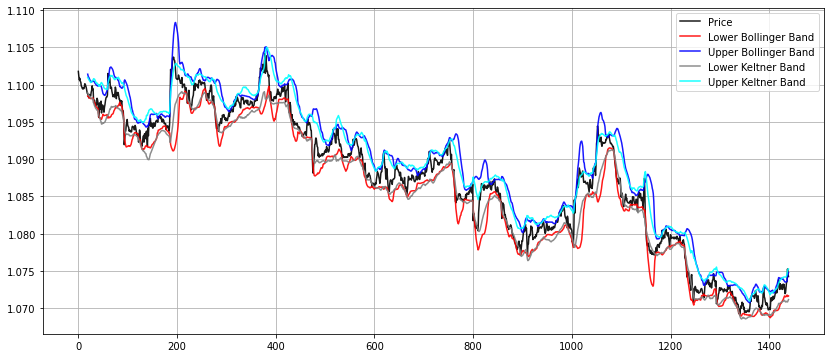

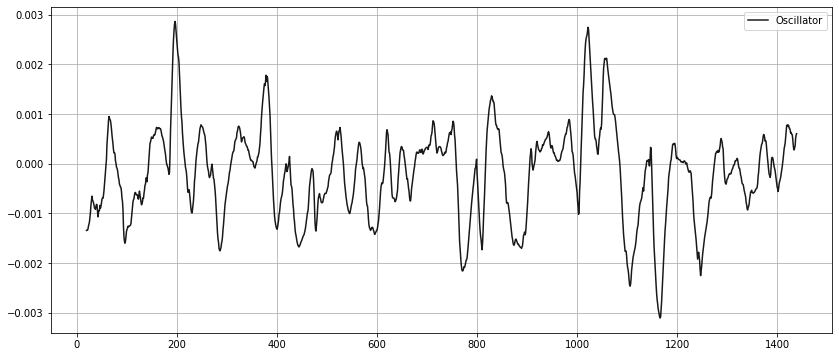

In [93]:






# plt.plot(df[f'BBM_{length}_{float(2)}'], label='Middle Bollinger Band', color='green', alpha=0.9)
# plt.plot(df[f'KCBe_{length}_{float(2)}'], label='Middle Keltner Band', color='violet', alpha=0.9)
# plt.plot(df[f'EMA_{length}'], label='EMA', color='orange', alpha=0.9)

plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.plot(df[f'BBL_{length}_{float(std)}'], label='Lower Bollinger Band', color='red', alpha=0.9)
plt.plot(df[f'BBU_{length}_{float(std)}'], label='Upper Bollinger Band', color='blue', alpha=0.9)
plt.plot(df[f'KCLe_{length}_{float(std)}'], label='Lower Keltner Band', color='gray', alpha=0.9)
plt.plot(df[f'KCUe_{length}_{float(std)}'], label='Upper Keltner Band', color='cyan', alpha=0.9)
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(14, 6))
plt.plot(df[f'DIFF_EMA_{length}'], label='Oscillator', color='black', alpha=0.9)
plt.legend()
plt.grid(True)
plt.show()




In [94]:




# Squeeze is on, when Bollinger Band is inside Keltner Channel.
df['SQUEEZE_ON'] = (df[f'KCLe_{length}_{float(std)}'] < df[f'BBL_{length}_{float(std)}']) & (df[f'KCUe_{length}_{float(std)}'] > df[f'BBU_{length}_{float(std)}'])

# Squeeze if off, when Keltner Channel is inside Bollinger Band.
df['SQUEEZE_OFF'] = (df[f'KCLe_{length}_{float(std)}'] > df[f'BBL_{length}_{float(std)}']) & (df[f'KCUe_{length}_{float(std)}'] < df[f'BBU_{length}_{float(std)}'])




